# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np 
import time, psutil, math 
import shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
%matplotlib inline

In [2]:
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import pickle
from tensorflow.keras import regularizers, optimizers

2.8.2


### Подготовка данных

In [3]:
# чтение данных
df1 = pd.read_excel('/content/drive/MyDrive/hw_data_composite.zip (Unzipped Files)/X_bp.xlsx')
df1.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [4]:
# чтение данных
df2 = pd.read_excel('/content/drive/MyDrive/hw_data_composite.zip (Unzipped Files)/X_nup.xlsx')
df2.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.0,57.0
1,1.0,0.0,4.0,60.0
2,2.0,0.0,4.0,70.0
3,3.0,0.0,5.0,47.0
4,4.0,0.0,5.0,57.0


In [5]:
# объединение и удаление ненужных переменных
df = df1.merge(df2, how = 'inner')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


### Разведочный анализ данных

In [6]:
df[15:30] # данные с 23 строки - уникальные, данные до 22 строки имеют другую размерность

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
15,2.934783,2030.000000,302.000000,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,10.0,47.0
16,3.557018,1880.000000,313.000000,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,10.0,57.0
17,4.193548,1950.000000,506.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000,0.0,10.0,60.0
18,4.897959,1890.000000,540.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000,0.0,10.0,70.0
19,3.532338,1980.000000,1183.000000,111.860000,22.267857,284.615385,1010.000000,78.000000,2000.000000,300.000000,0.0,0.0,0.0
20,2.877358,2000.000000,205.000000,111.860000,22.267857,284.615385,1010.000000,78.000000,2000.000000,300.000000,90.0,4.0,47.0
21,1.598174,1920.000000,456.000000,111.860000,22.267857,284.615385,470.000000,73.333333,2455.555556,220.000000,90.0,4.0,57.0
22,4.029126,1880.000000,622.000000,111.860000,22.267857,284.615385,470.000000,73.333333,2455.555556,220.000000,90.0,4.0,60.0
23,2.587348,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117,90.0,4.0,70.0
24,2.499918,1942.595777,901.519947,146.252208,23.081757,351.231874,864.725484,76.178075,3705.672523,226.222760,90.0,5.0,47.0


In [7]:
df.count()-df.nunique() # количество повторяющихся значений (не уникальных) как подтверждение гипотезы, что данные с 1 по 22 строки предобработаны

Соотношение матрица-наполнитель            9
Плотность, кг/м3                          10
модуль упругости, ГПа                      3
Количество отвердителя, м.%               18
Содержание эпоксидных групп,%_2           19
Температура вспышки, С_2                  20
Поверхностная плотность, г/м2             19
Модуль упругости при растяжении, ГПа      19
Прочность при растяжении, МПа             19
Потребление смолы, г/м2                   20
Угол нашивки, град                      1021
Шаг нашивки                               34
Плотность нашивки                         35
dtype: int64

In [8]:
df.isna().sum() #считаем количество пропусков

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [9]:
df.dtypes.value_counts()

float64    13
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

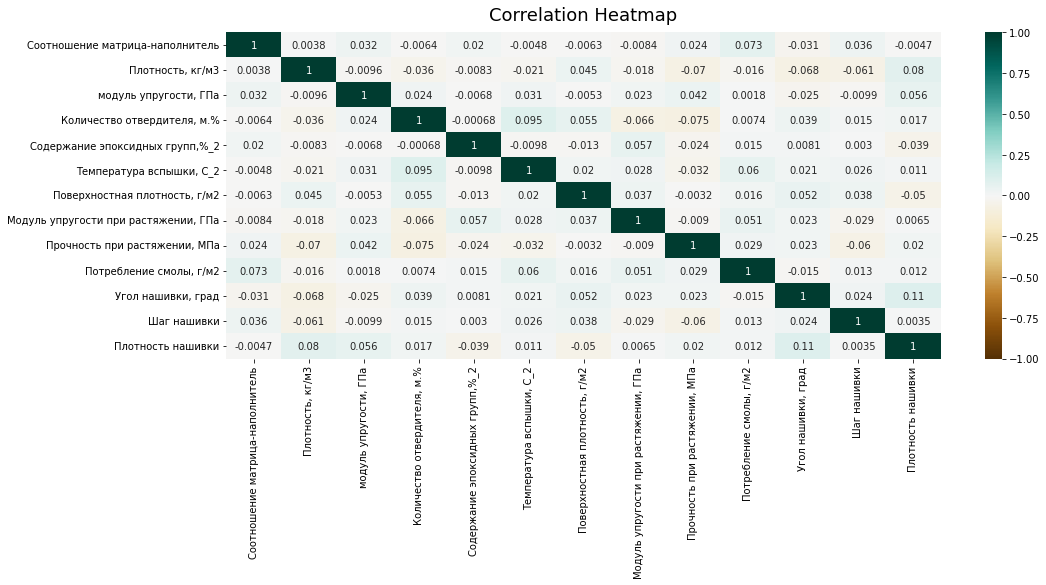

In [10]:
# проверка корреляции
df.corr() 

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

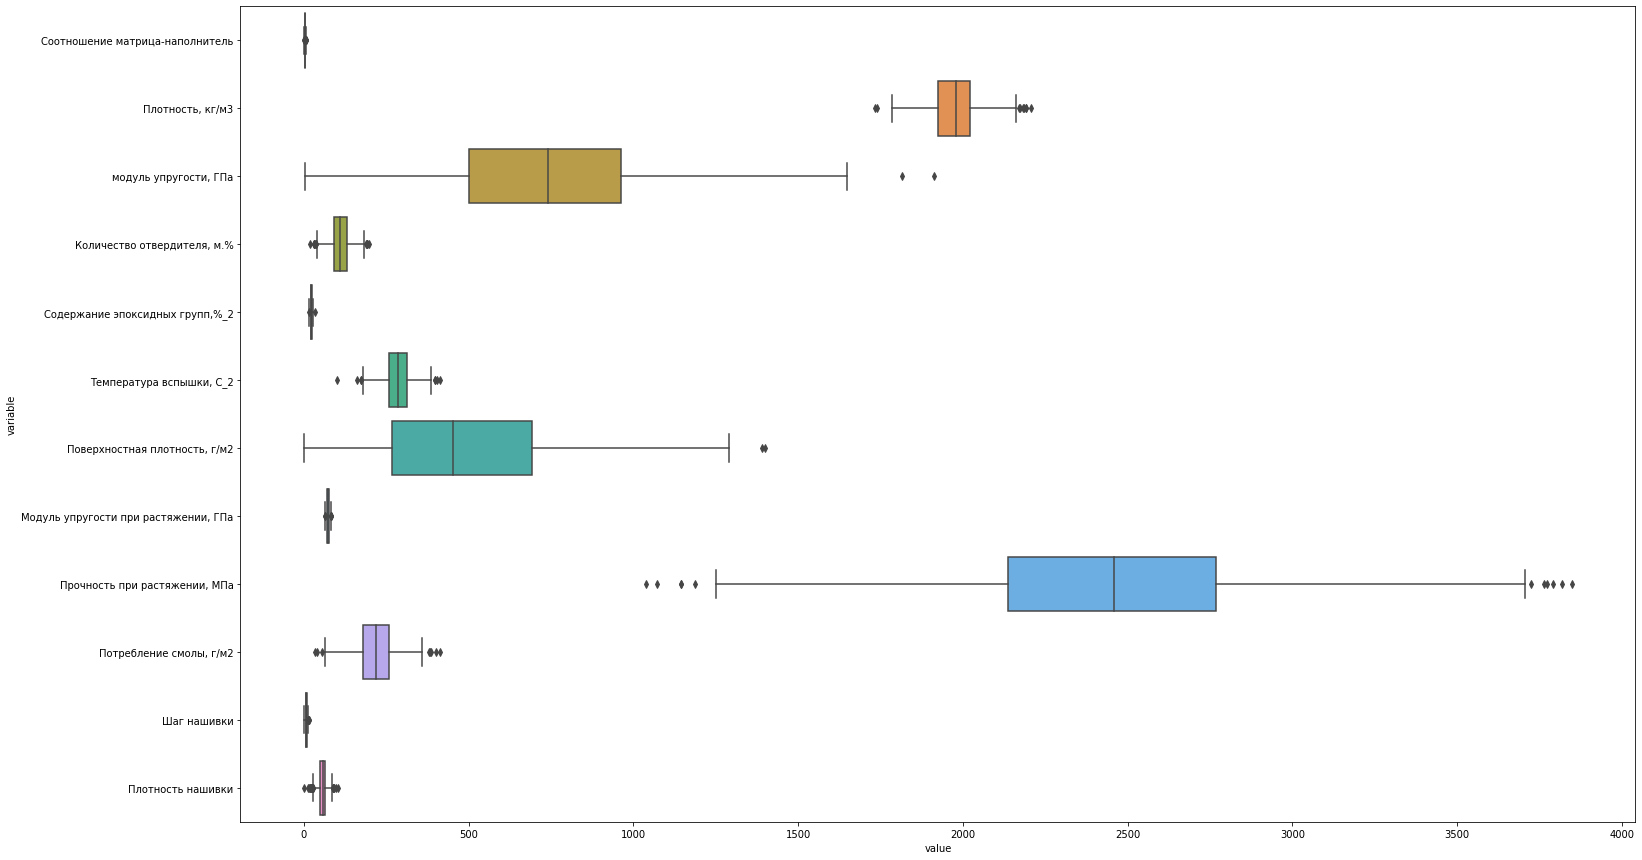

In [11]:
# ящики с усами
df = pd.DataFrame(data=df, columns=["Соотношение матрица-наполнитель", "Плотность, кг/м3", "модуль упругости, ГПа", 
                                    "Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", 
                                    "Температура вспышки, С_2", "Поверхностная плотность, г/м2", 
                                    "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", 
                                    "Потребление смолы, г/м2", "Шаг нашивки", "Плотность нашивки"])

plt.figure(figsize=(25, 15))
sns.boxplot(x="value", y="variable", data=pd.melt(df))

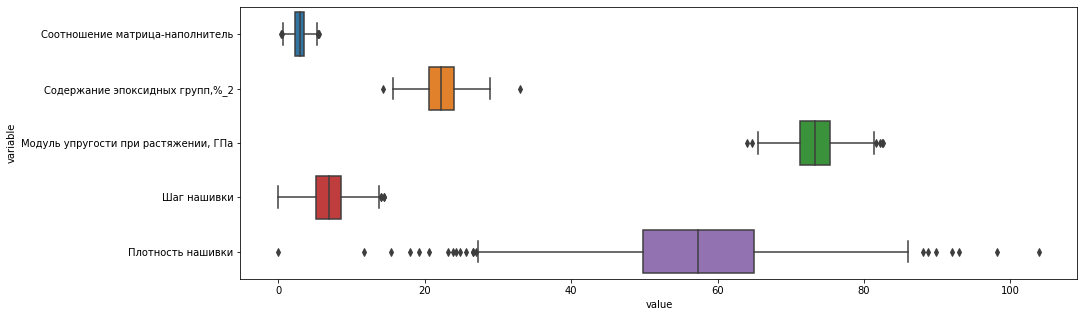

In [12]:
bp1 = pd.DataFrame(data=df, columns=["Соотношение матрица-наполнитель", "Содержание эпоксидных групп,%_2", 
                                     "Модуль упругости при растяжении, ГПа", "Шаг нашивки", "Плотность нашивки"])

plt.figure(figsize=(15, 5))
sns.boxplot(x="value", y="variable", data=pd.melt(bp1))

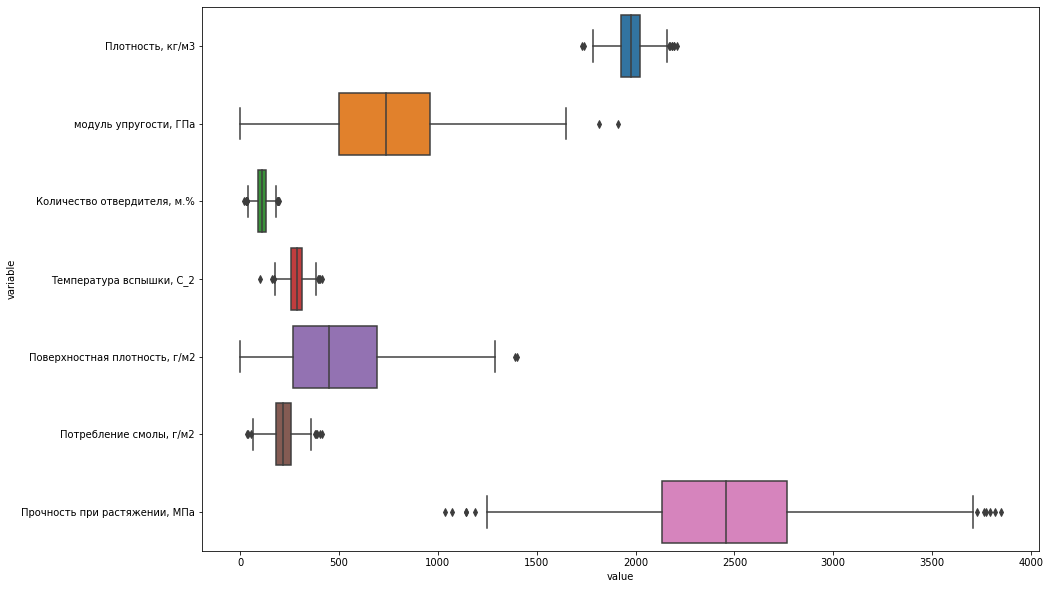

In [13]:
bp2 = pd.DataFrame(data=df, columns=["Плотность, кг/м3", "модуль упругости, ГПа", "Количество отвердителя, м.%", 
                                     "Температура вспышки, С_2", "Поверхностная плотность, г/м2", 
                                     "Потребление смолы, г/м2", "Прочность при растяжении, МПа"])

plt.figure(figsize=(15, 10))
sns.boxplot(x="value", y="variable", data=pd.melt(bp2))

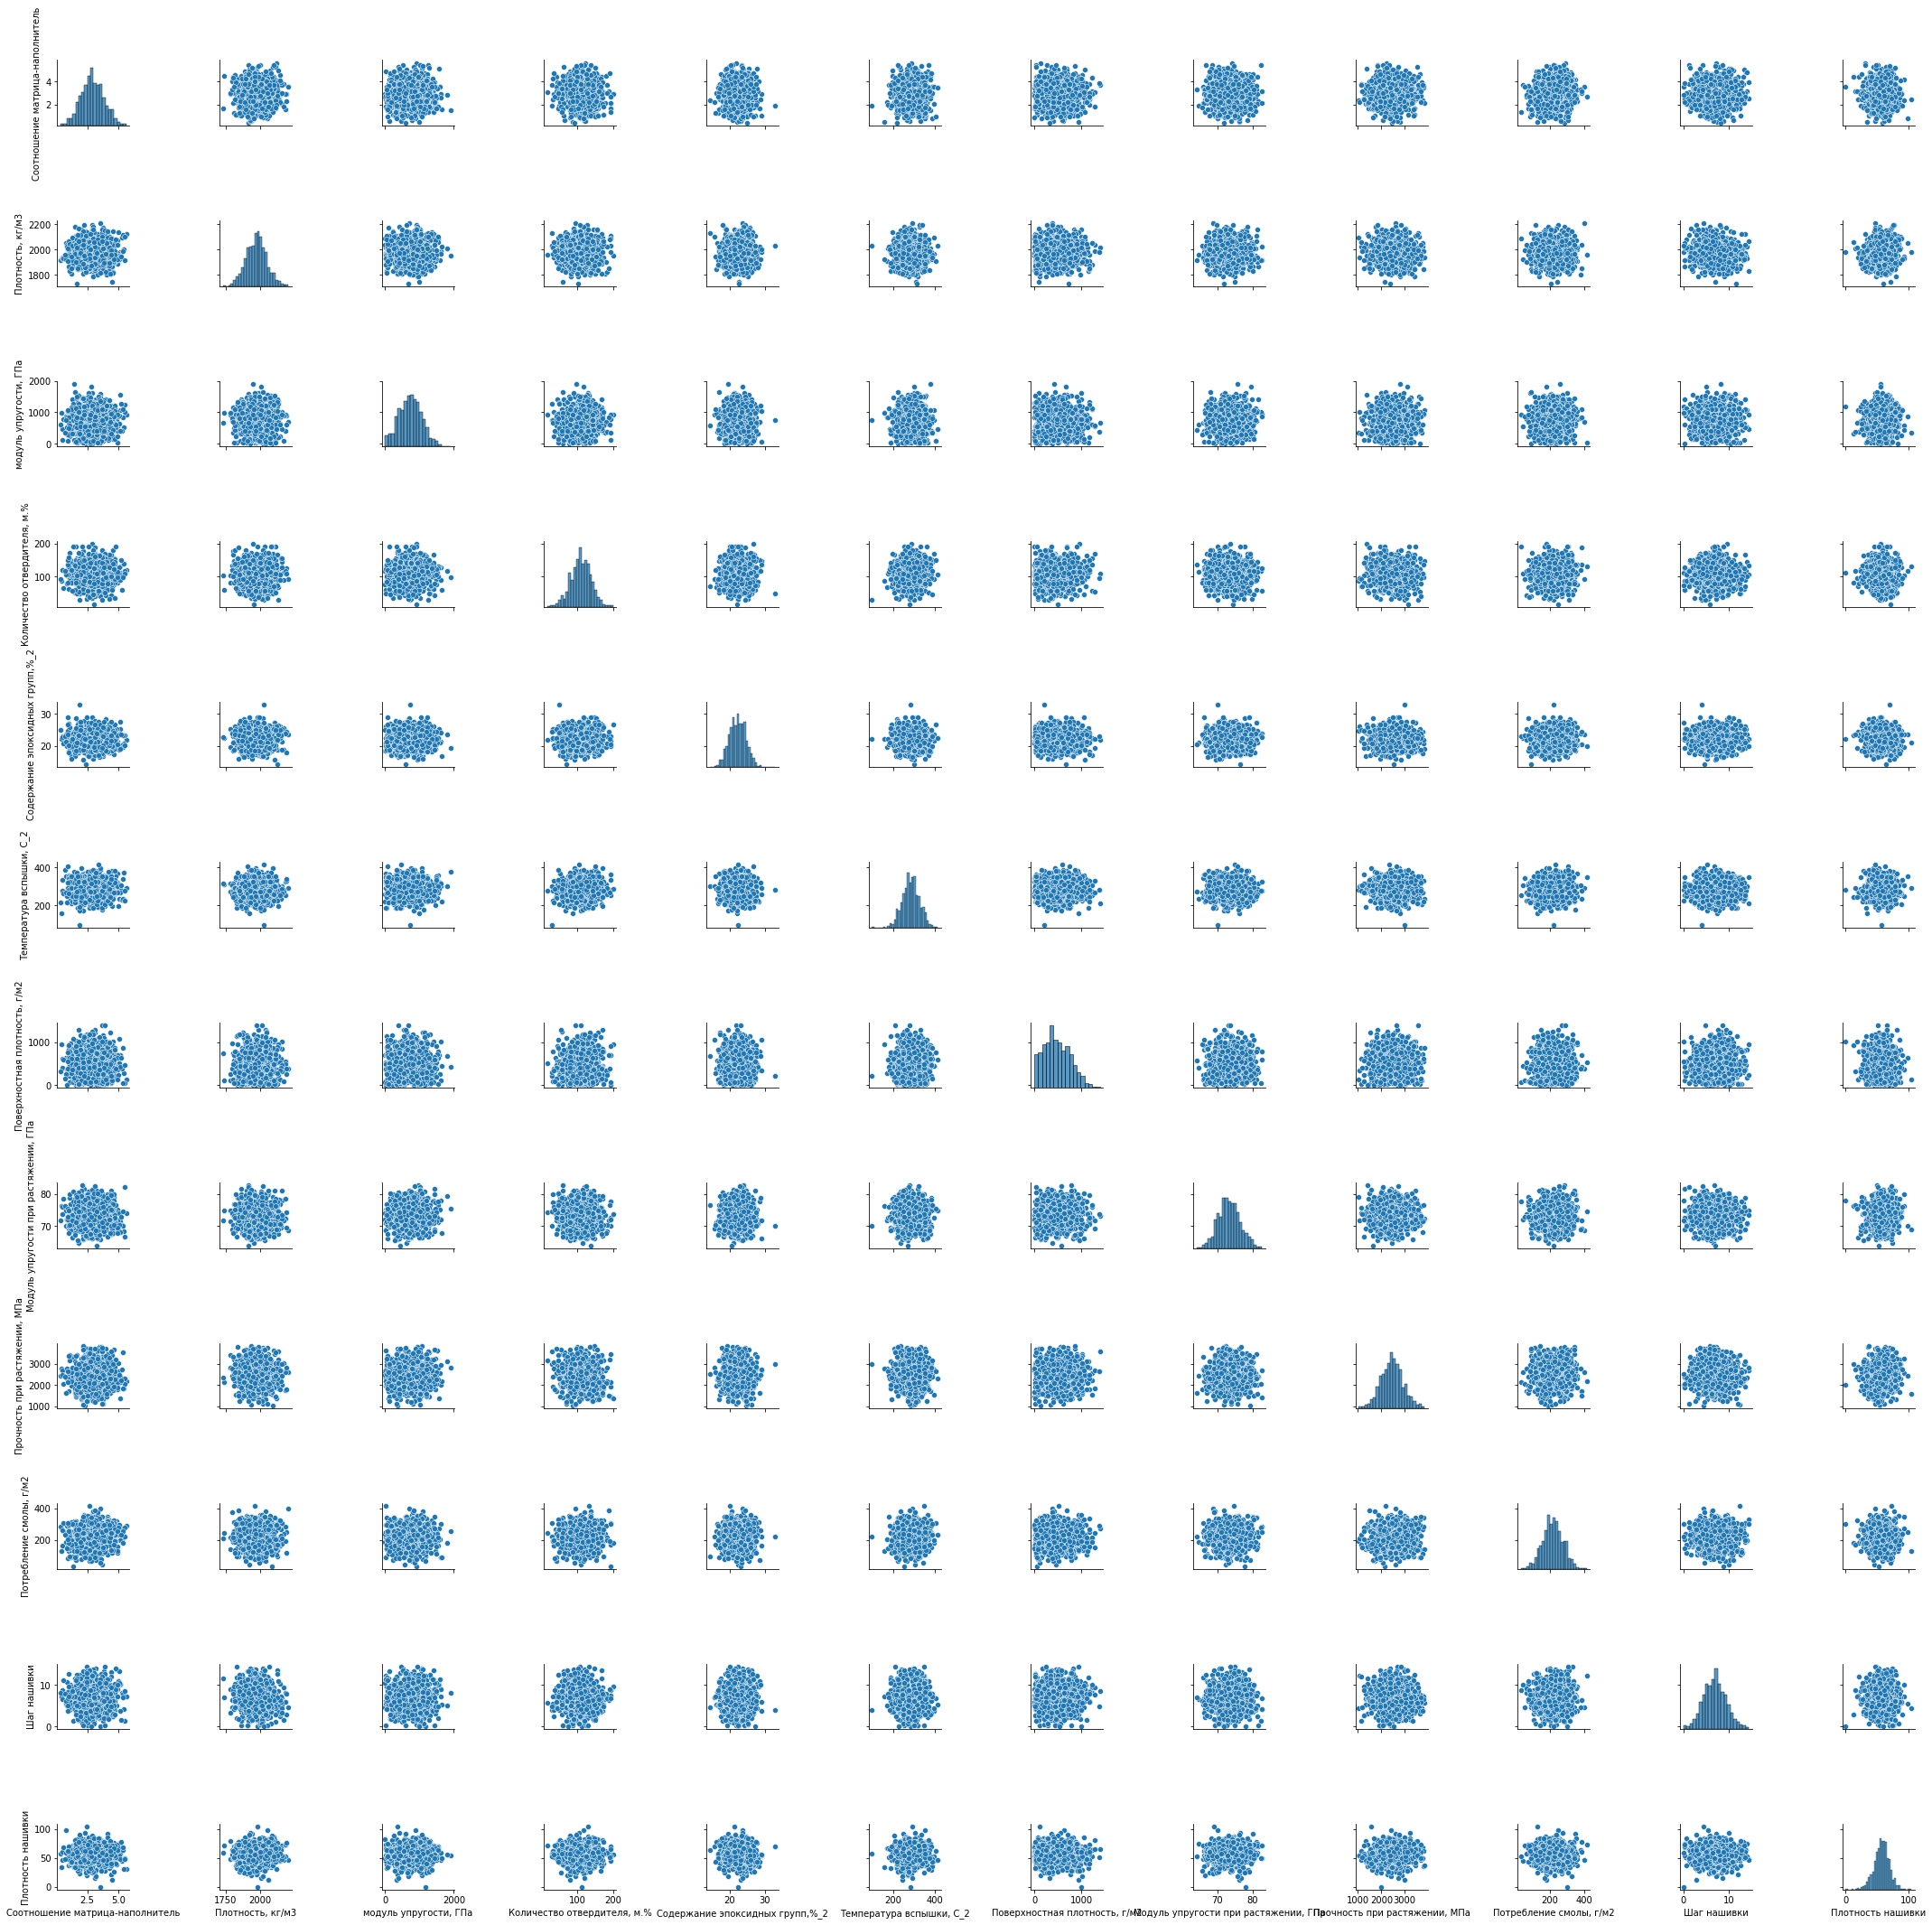

In [14]:
# попарные графики рассеяния точек
df = pd.DataFrame(data=df, columns=["Соотношение матрица-наполнитель", "Плотность, кг/м3", "модуль упругости, ГПа", 
                                    "Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", 
                                    "Температура вспышки, С_2", "Поверхностная плотность, г/м2", 
                                    "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", 
                                    "Потребление смолы, г/м2", "Шаг нашивки", "Плотность нашивки"])
sns.pairplot(df, diag_kind="hist") #рисуем попарные диаграммы для признака

In [15]:
df.describe().transpose()[['mean', '50%']]

,mean,50%
Соотношение матрица-наполнитель,2.930366,2.906878
"Плотность, кг/м3",1975.734888,1977.621657
"модуль упругости, ГПа",739.923233,739.664328
"Количество отвердителя, м.%",110.570769,110.564840
"Содержание эпоксидных групп,%_2",22.244390,22.230744
"Температура вспышки, С_2",285.882151,285.896812
"Поверхностная плотность, г/м2",482.731833,451.864365
"Модуль упругости при растяжении, ГПа",73.328571,73.268805
"Прочность при растяжении, МПа",2466.922843,2459.524526
"Потребление смолы, г/м2",218.423144,219.198882


### Предобработка данных

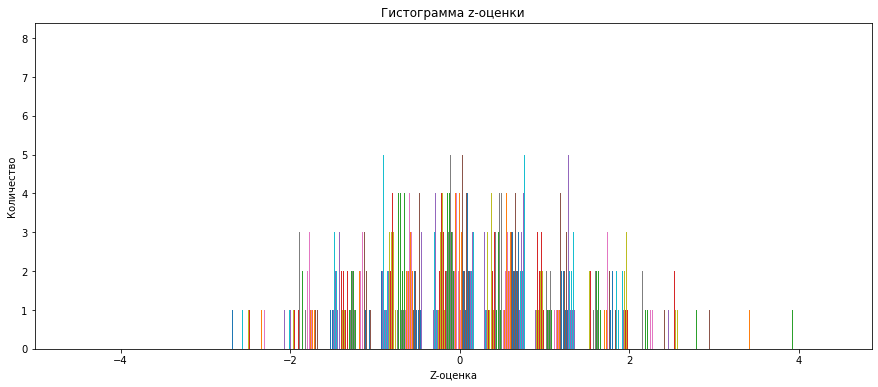

In [18]:
# определяем выбросы по правилу трех сигм
def plot_hist(x="columns", title="Распределение по столбцам", xlabel="columns"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Количество")
    plt.hist(x, bins = 15)
    plt.show()

df = (df - df.mean()) / df.std()

fig = plt.figure(figsize = (15,6))
plot_hist(df, title="Гистограмма z-оценки", xlabel="Z-оценка")

In [19]:
df_preprocessed = df[abs(df) <= 3]

In [20]:
df_preprocessed.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,-1.175205,0.736005,-0.003593,-2.847435,0.009753,NaN,-0.96949,-1.067198,1.097707,0.026397,-1.130977,-0.012463
1,-1.175205,0.736005,-0.003593,-2.140619,0.625695,-0.030940,-0.96949,-1.067198,1.097707,0.026397,-1.130977,0.230433
2,-1.175205,0.736005,-0.003593,-2.144153,NaN,-0.030940,-0.96949,-1.067198,1.097707,0.026397,-1.130977,1.040086
3,-1.175205,0.736005,-0.003593,0.651304,-0.413244,0.344815,-0.96949,-1.067198,1.097707,0.026397,-0.740880,-0.822116
4,-0.174147,0.736005,0.039599,0.045562,0.009753,-0.030940,-0.96949,-1.067198,1.097707,0.026397,-0.740880,-0.012463


In [21]:
df_outliers = df[abs(df) > 3]

In [22]:
df_outliers.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,NaN,NaN,NaN,NaN,NaN,-4.539994,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,4.469769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_outliers.count()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        3
модуль упругости, ГПа                   2
Количество отвердителя, м.%             2
Содержание эпоксидных групп,%_2         2
Температура вспышки, С_2                3
Поверхностная плотность, г/м2           2
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 3
Шаг нашивки                             0
Плотность нашивки                       7
dtype: int64

In [24]:
minmax_scaler = MinMaxScaler()
df_norm = minmax_scaler.fit_transform(np.array(df))
df_norm = df

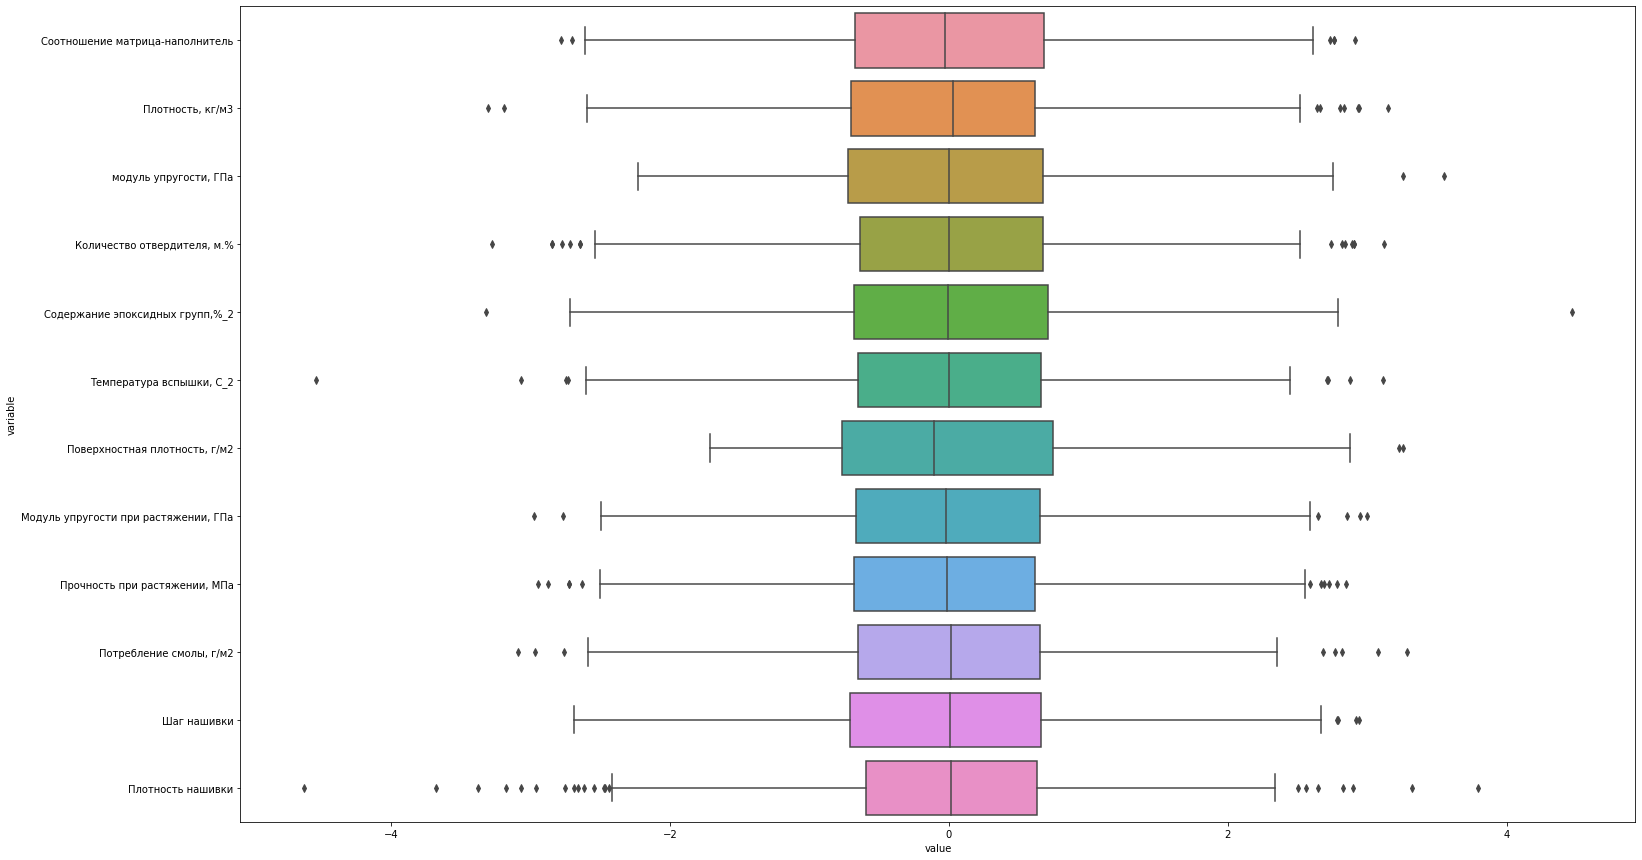

In [25]:
# диаграммы ящика с усами после нормализации
df = pd.DataFrame(data=df, columns=["Соотношение матрица-наполнитель", "Плотность, кг/м3", "модуль упругости, ГПа", 
                                    "Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", 
                                    "Температура вспышки, С_2", "Поверхностная плотность, г/м2", 
                                    "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", 
                                    "Потребление смолы, г/м2", "Шаг нашивки", "Плотность нашивки"])

plt.figure(figsize=(25, 15))
sns.boxplot(x="value", y="variable", data=pd.melt(df))

Text(0.5, 1.0, 'Correlation Heatmap')

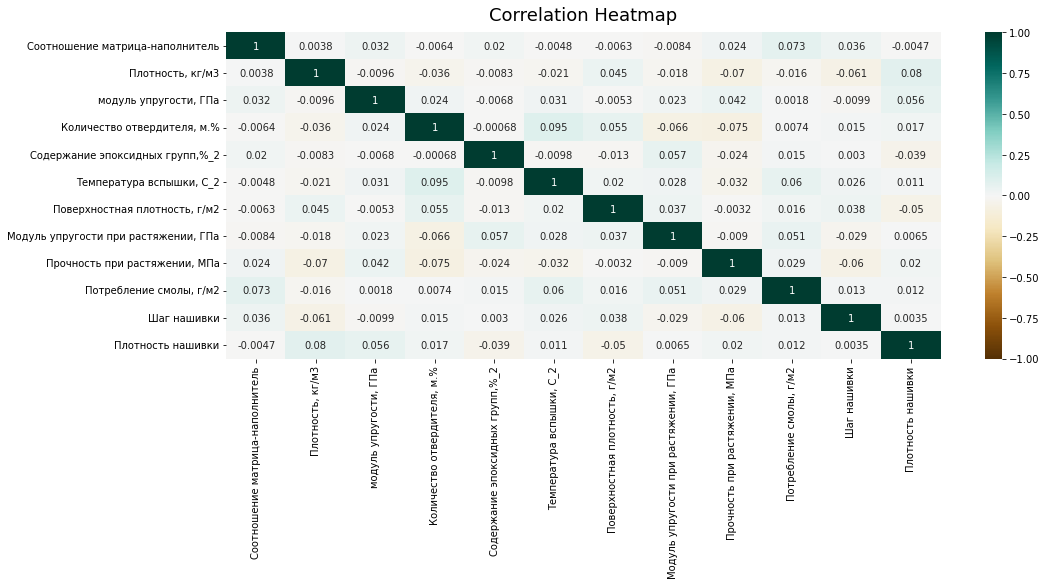

In [26]:
# проверка корреляции после нормализации
df.corr() 

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [27]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,-1.175205,0.736005,-0.003593,-2.847435,0.009753,-4.539994,-0.96949,-1.067198,1.097707,0.026397,-1.130977,-0.012463
1,-1.175205,0.736005,-0.003593,-2.140619,0.625695,-0.030940,-0.96949,-1.067198,1.097707,0.026397,-1.130977,0.230433
2,-1.175205,0.736005,-0.003593,-2.144153,4.469769,-0.030940,-0.96949,-1.067198,1.097707,0.026397,-1.130977,1.040086
3,-1.175205,0.736005,-0.003593,0.651304,-0.413244,0.344815,-0.96949,-1.067198,1.097707,0.026397,-0.740880,-0.822116
4,-0.174147,0.736005,0.039599,0.045562,0.009753,-0.030940,-0.96949,-1.067198,1.097707,0.026397,-0.740880,-0.012463


## Разработка и обучение модели

In [32]:
# создание выборок
X, y = df.values[:, :-1], df.values[:, -1]  #создаем X и y (все х, кроме последнего, и только последний у)

In [33]:
# LabelEncoder для y
y = LabelEncoder().fit_transform(y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(716, 11)
(307, 11)
(716,)
(307,)


In [36]:
df_train = df.sample(frac  = 0.3, random_state = 42) #разделяем выборку на обучающую и тестовую
df_test = df.drop(df_train.index)

# делим датасет на признаки и то, что мы будем предсказывать
train_features = df_train.copy() 
test_features = df_test.copy()

train_labels = train_features.pop('Соотношение матрица-наполнитель')
test_labels = test_features.pop('Соотношение матрица-наполнитель')

In [37]:
normalizer = tf.keras.layers.Normalization(axis = -1) #слой для преобразования признака

In [38]:
normalizer.adapt(np.array(train_features)) #адаптируем к обучающей выборке
print(normalizer.mean.numpy())

[[ 0.06110237  0.03088174  0.00855365  0.05775636  0.08521181  0.02741841
   0.09064738  0.01147325 -0.03589456  0.03873355  0.03774789]]


In [39]:
first = np.array(train_features[:1])

with np.printoptions(precision = 2):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[-0.18 -0.2  -1.3  -1.43  1.59 -0.25  1.24  0.22  0.88 -0.61 -1.05]]

Normalized: [[-0.22 -0.22 -1.32 -1.47  1.57 -0.28  1.13  0.21  0.89 -0.64 -1.15]]


### Построение линейной модели от modul_upr

In [40]:
modul_upr = np.array(train_features['Модуль упругости при растяжении, ГПа'])

modul_upr_normalizer = layers.Normalization(input_shape = [1,], axis = None) #нормалайзер
modul_upr_normalizer.adapt(modul_upr)

In [41]:
modul_upr_model = tf.keras.Sequential([modul_upr_normalizer, 
                                        layers.Dense(units = 1)]) #создаем нейронную сеть (первый слой - нормалайзер, второй слой - полносвязный, в котором количество нейронов = 1)

modul_upr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [43]:
#необходимо скомпилировать, чтобы сделать значения похожими
modul_upr_model.compile( 
    optimizer = tf.optimizers.Adam(learning_rate = 0.1), 
    loss = 'mean_absolute_error') #потери считаем методом средней абсолютной ошибки

In [44]:
%%time
history = modul_upr_model.fit(
    train_features['Модуль упругости при растяжении, ГПа'],
    train_labels, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 49ms/step - loss: 0.8786 - val_loss: 0.7421
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.8745 - val_loss: 0.7385
Epoch 3/100
8/8 [==============================] - 0s 34ms/step - loss: 0.8476 - val_loss: 0.7630
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 0.8643 - val_loss: 0.7593
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.8500 - val_loss: 0.7357
Epoch 6/100
8/8 [==============================] - 0s 33ms/step - loss: 0.8511 - val_loss: 0.7380
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 0.8473 - val_loss: 0.7446
Epoch 8/100
8/8 [==============================] - 0s 21ms/step - loss: 0.8508 - val_loss: 0.7379
Epoch 9/100
8/8 [==============================] - 0s 22ms/step - loss: 0.8648 - val_loss: 0.7412
Epoch 10/100
8/8 [==============================] - 0s 22ms/step - loss: 0.8497 - val_loss: 0.7432
Epoch 11/100
8/8 [=

In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.849773,0.749949,95
96,0.865536,0.737293,96
97,0.854819,0.755619,97
98,0.853446,0.737797,98
99,0.851348,0.735327,99


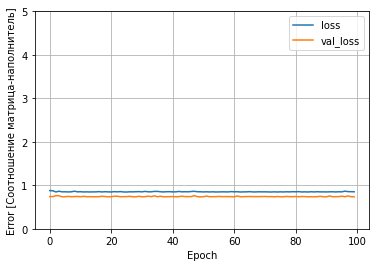

In [46]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0, 5])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Соотношение матрица-наполнитель]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [47]:
test_results = {}

test_results['modul_upr_model'] = modul_upr_model.evaluate(
    test_features['Модуль упругости при растяжении, ГПа'],
    test_labels, verbose = 0)

test_results


{'modul_upr_model': 0.786846399307251}

In [63]:
x = tf.linspace(-5, 5, 2)
y = modul_upr_model.predict(x)

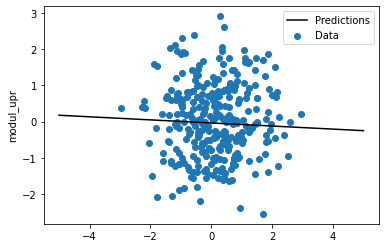

In [64]:
def plot_modul_upr(x, y):
    plt.scatter(train_features['Модуль упругости при растяжении, ГПа'], train_labels, label = 'Data')
    plt.plot(x, y, color = 'k', label = 'Predictions')
    plt.xlabel
    plt.ylabel('modul_upr')
    plt.legend()

plot_modul_upr(x, y)

### Построение линейной модели от prchn

In [50]:
prchn = np.array(train_features['Прочность при растяжении, МПа'])

prchn_normalizer = layers.Normalization(input_shape = [1,], axis = None) #нормалайзер
prchn_normalizer.adapt(prchn)

In [51]:
prchn_model = tf.keras.Sequential([prchn_normalizer, 
                                        layers.Dense(units = 1)]) #создаем нейронную сеть (первый слой - нормалайзер, второй слой - полносвязный, в котором количество нейронов = 1)

prchn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [52]:
#необходимо скомпилировать, чтобы сделать значения похожими
prchn_model.compile( 
    optimizer = tf.optimizers.Adam(learning_rate = 0.1), 
    loss = 'mean_absolute_error') #потери считаем методом средней абсолютной ошибки

In [53]:
%%time
history = prchn_model.fit(
    train_features['Прочность при растяжении, МПа'],
    train_labels, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 21ms/step - loss: 1.2946 - val_loss: 0.9972
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.9482 - val_loss: 0.7335
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8512 - val_loss: 0.7946
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8746 - val_loss: 0.7694
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8553 - val_loss: 0.7332
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8509 - val_loss: 0.7367
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8546 - val_loss: 0.7319
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8498 - val_loss: 0.7448
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8490 - val_loss: 0.7340
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.8458 - val_loss: 0.7350
Epoch 11/100
8/8 [==========

In [54]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.852221,0.743664,95
96,0.850929,0.738756,96
97,0.846235,0.733001,97
98,0.848272,0.735017,98
99,0.849213,0.735947,99


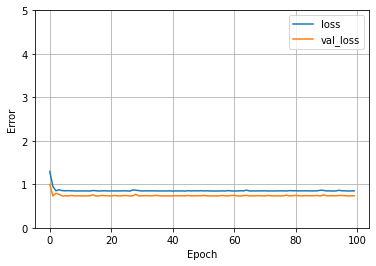

In [55]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0, 5])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [56]:
test_results = {}

test_results['prchn_model'] = prchn_model.evaluate(
    test_features['Прочность при растяжении, МПа'],
    test_labels, verbose = 0)

test_results


{'prchn_model': 0.7905725240707397}

In [57]:
x = tf.linspace(-5, 5, 2)
y = prchn_model.predict(x)

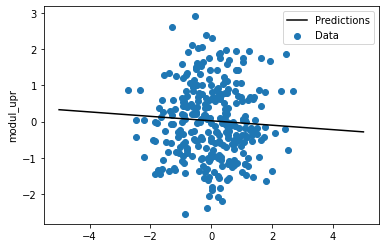

In [58]:
def plot_prchn(x, y):
    plt.scatter(train_features['Прочность при растяжении, МПа'], train_labels, label = 'Data')
    plt.plot(x, y, color = 'k', label = 'Predictions')
    plt.xlabel
    plt.ylabel('modul_upr')
    plt.legend()

plot_prchn(x, y)

### Построение линейной модели

In [65]:
#построение линейной модели (вводим нормалайзер, который использует все признаки)
linear_model = tf.keras.Sequential([
                normalizer, layers.Dense(units = 1)])

In [66]:
linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss = 'mean_absolute_error')

In [67]:
%%time
history = linear_model.fit(
    train_features,
    train_labels, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 1.2025 - val_loss: 0.8861
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.9021 - val_loss: 0.7570
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8838 - val_loss: 0.8932
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8709 - val_loss: 0.9546
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8392 - val_loss: 0.8634
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8561 - val_loss: 0.8560
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.8490 - val_loss: 0.9222
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8702 - val_loss: 0.8505
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8513 - val_loss: 0.8447
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 0.8442 - val_loss: 0.8767
Epoch 11/100
8/8 [=========

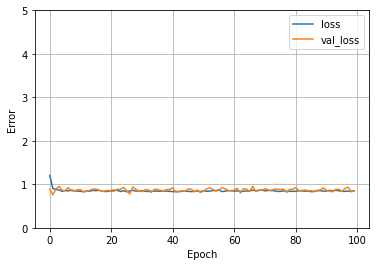

In [68]:
plot_loss(history)

In [69]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose = 0)

In [70]:
test_results['linear_model']

0.8357212543487549

## Построение нейронной сети (многослойный персептрон)

In [71]:
def build_and_compile_model(norm):
    model = keras.Sequential([
            norm,
            layers.Dense(64, activation = 'relu'),
            layers.Dense(64, activation = 'relu'),
            layers.Dense(1)])
    
    model.compile(loss = 'mean_absolute_error',
                  optimizer = tf.keras.optimizers.Adam(0.001))
    return model

In [72]:
matrix_model = build_and_compile_model(normalizer)
matrix_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [73]:
%%time
history = matrix_model.fit(
    train_features,
    train_labels, 
    validation_split = 0.2,
    verbose = 1,
    epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 0.8589 - val_loss: 0.8382
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8210 - val_loss: 0.8449
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8031 - val_loss: 0.8508
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7830 - val_loss: 0.8632
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7698 - val_loss: 0.8712
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7567 - val_loss: 0.8648
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7432 - val_loss: 0.8648
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7344 - val_loss: 0.8679
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7199 - val_loss: 0.8759
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7064 - val_loss: 0.8861
Epoch 11/100
8/8 [==========

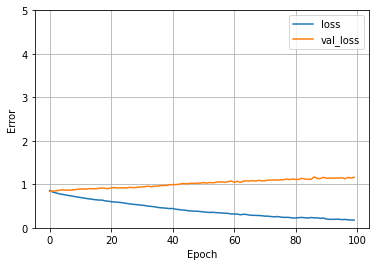

In [74]:
plot_loss(history)

In [83]:
test_results['matrix_model'] = matrix_model.evaluate(
    test_features, test_labels,
    verbose = 1)

23/23 [==============================] - 0s 4ms/step - loss: 0.9565


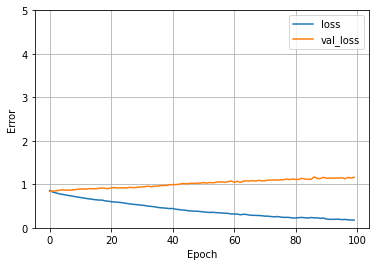

In [84]:
plot_loss(history)

In [85]:
pd.DataFrame(test_results, index = ['Mean absolute error [Соотношение матрица-наполнитель]']).T

,Mean absolute error [Соотношение матрица-наполнитель]
prchn_model,0.790573
linear_model,0.835721
matrix_model,0.956481


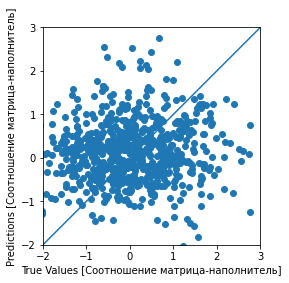

In [89]:
test_predictions = matrix_model.predict(test_features).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Соотношение матрица-наполнитель]')
plt.ylabel('Predictions [Соотношение матрица-наполнитель]')
lims = [-2, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

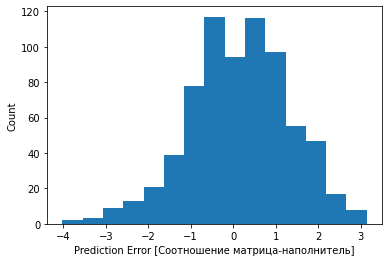

In [87]:
error = test_predictions - test_labels
plt.hist(error, bins = 15)
plt.xlabel('Prediction Error [Соотношение матрица-наполнитель]')
_ = plt.ylabel('Count')

In [88]:
test_results

{'linear_model': 0.8357212543487549,
 'matrix_model': 0.9564805030822754,
 'prchn_model': 0.7905725240707397}

## Тестирование модели

### Линейная регрессия

In [90]:
y = df['Модуль упругости при растяжении, ГПа']
X = df.drop(columns=['Модуль упругости при растяжении, ГПа'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared = False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
print(f"Контролирующая выборка RMSE = {test_data_rmse:.4f}")
print(f"Обучающая выборка RMSE = {training_data_rmse:.4f}")

Контролирующая выборка RMSE = 1.0203
Обучающая выборка RMSE = 0.9820


In [91]:
y = df['Прочность при растяжении, МПа']
X = df.drop(columns=['Прочность при растяжении, МПа'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared = False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
print(f"Контролирующая выборка RMSE = {test_data_rmse:.4f}")
print(f"Обучающая выборка RMSE = {training_data_rmse:.4f}")

Контролирующая выборка RMSE = 0.9721
Обучающая выборка RMSE = 0.9985


### K-fold

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


29/29 [==============================] - 1s 15ms/step - loss: -215.6642 - val_loss: -622.6330
Epoch 2/10
29/29 [==============================] - 0s 6ms/step - loss: -995.9758 - val_loss: -1634.2635
Epoch 3/10
29/29 [==============================] - 0s 5ms/step - loss: -2255.9829 - val_loss: -3371.5603
Epoch 4/10
29/29 [==============================] - 0s 6ms/step - loss: -4426.6509 - val_loss: -6263.1157
Epoch 5/10
29/29 [==============================] - 0s 6ms/step - loss: -7933.6929 - val_loss: -10747.0488
Epoch 6/10
29/29 [==============================] - 0s 6ms/step - loss: -13258.4072 - val_loss: -17367.9688
Epoch 7/10
29/29 [==============================] - 0s 6ms/step - loss: -20938.3691 - val_loss: -26727.4219
Epoch 8/10
29/29 [==============================] - 0s 6ms/step - loss: -31691.1289 - val_loss: -39161.4219
Epoch 9/10
29/29 [==============================] - 0s 6ms/step - loss: -45845.3125 - val_loss: -55595.9648
Epoch 10/10
29/29 [==============================]

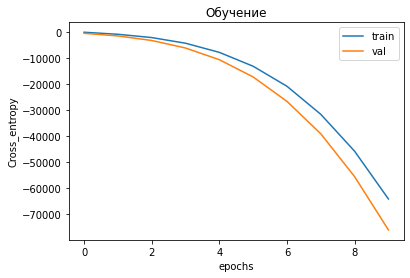

Epoch 1/10
29/29 [==============================] - 2s 14ms/step - loss: -152.1754 - val_loss: -468.3416
Epoch 2/10
29/29 [==============================] - 0s 11ms/step - loss: -827.4299 - val_loss: -1229.8546
Epoch 3/10
29/29 [==============================] - 0s 7ms/step - loss: -1781.1503 - val_loss: -2439.6047
Epoch 4/10
29/29 [==============================] - 0s 7ms/step - loss: -3357.8486 - val_loss: -4421.7778
Epoch 5/10
29/29 [==============================] - 0s 10ms/step - loss: -5836.7529 - val_loss: -7527.9067
Epoch 6/10
29/29 [==============================] - 0s 8ms/step - loss: -9618.0703 - val_loss: -12060.9834
Epoch 7/10
29/29 [==============================] - 0s 12ms/step - loss: -15069.5469 - val_loss: -18539.7676
Epoch 8/10
29/29 [==============================] - 0s 9ms/step - loss: -22691.6562 - val_loss: -27384.6797
Epoch 9/10
29/29 [==============================] - 0s 9ms/step - loss: -32871.0703 - val_loss: -38896.0586
Epoch 10/10
29/29 [===================

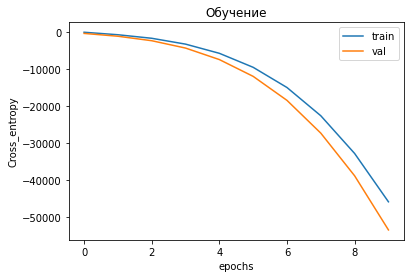

Epoch 1/10
29/29 [==============================] - 4s 116ms/step - loss: -236.2745 - val_loss: -609.5343
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: -1050.4614 - val_loss: -1678.8904
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: -2417.9072 - val_loss: -3549.5278
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: -4781.6343 - val_loss: -6769.7549
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: -8787.2129 - val_loss: -11919.7852
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: -14929.2314 - val_loss: -19714.1172
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: -23789.7930 - val_loss: -30513.2402
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: -36033.7188 - val_loss: -44739.4609
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: -52010.3867 - val_loss: -63518.3203
Epoch 10/10
29/29 [==================

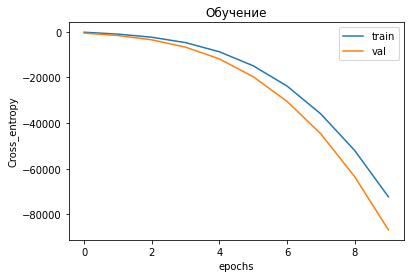

Epoch 1/10
29/29 [==============================] - 1s 9ms/step - loss: -250.6096 - val_loss: -527.7408
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: -928.6104 - val_loss: -1396.7476
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: -2174.9639 - val_loss: -2998.1777
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: -4437.7021 - val_loss: -5802.6914
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: -8185.0215 - val_loss: -10281.4189
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: -14056.1084 - val_loss: -16846.9102
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: -22454.6191 - val_loss: -26202.2676
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: -34235.9922 - val_loss: -38857.4609
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: -49909.2969 - val_loss: -55416.7148
Epoch 10/10
29/29 [=====================

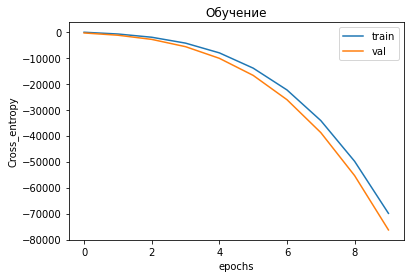

Epoch 1/10
29/29 [==============================] - 1s 9ms/step - loss: -143.2471 - val_loss: -454.1574
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: -714.5982 - val_loss: -1150.7795
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: -1615.8956 - val_loss: -2380.4751
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: -3238.2036 - val_loss: -4580.3325
Epoch 5/10
29/29 [==============================] - 0s 5ms/step - loss: -6029.7417 - val_loss: -8268.0771
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: -10544.9707 - val_loss: -14000.8789
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: -17355.1445 - val_loss: -22150.0879
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: -26950.4531 - val_loss: -33303.8789
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: -39754.6406 - val_loss: -47998.1328
Epoch 10/10
29/29 [======================

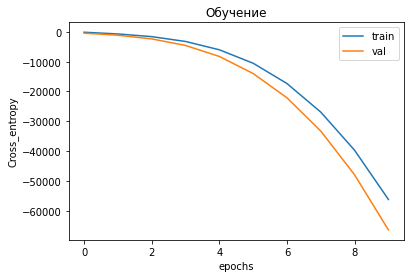

Epoch 1/10
29/29 [==============================] - 1s 10ms/step - loss: -545.0413 - val_loss: -914.8500
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: -1500.7289 - val_loss: -2084.8889
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: -3205.7888 - val_loss: -4245.6758
Epoch 4/10
29/29 [==============================] - 0s 5ms/step - loss: -6177.7896 - val_loss: -7765.5073
Epoch 5/10
29/29 [==============================] - 0s 5ms/step - loss: -10796.0312 - val_loss: -13135.5381
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: -17603.1621 - val_loss: -20633.6660
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: -27043.3770 - val_loss: -31045.0195
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: -39942.0156 - val_loss: -45011.7266
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: -57013.8906 - val_loss: -63166.5508
Epoch 10/10
29/29 [==================

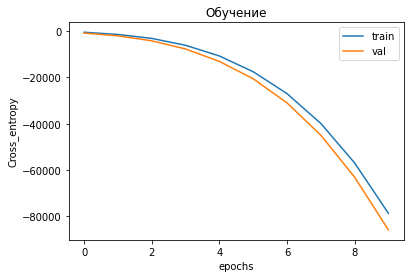

Epoch 1/10
29/29 [==============================] - 1s 8ms/step - loss: -147.5163 - val_loss: -468.5102
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: -845.0377 - val_loss: -1375.9575
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: -2057.9158 - val_loss: -3048.9570
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: -4196.7100 - val_loss: -5828.8525
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: -7637.6025 - val_loss: -10228.9785
Epoch 6/10
29/29 [==============================] - 0s 5ms/step - loss: -12959.8604 - val_loss: -16786.8496
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: -20889.5195 - val_loss: -26228.1836
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: -31913.9238 - val_loss: -39223.5938
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: -46713.7812 - val_loss: -56037.9375
Epoch 10/10
29/29 [=====================

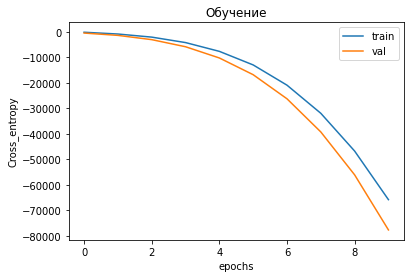

Epoch 1/10
29/29 [==============================] - 1s 9ms/step - loss: -502.8123 - val_loss: -939.7095
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: -1399.0969 - val_loss: -2147.6318
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: -2934.3013 - val_loss: -4208.8662
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: -5499.1553 - val_loss: -7486.6729
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: -9505.6680 - val_loss: -12441.2402
Epoch 6/10
29/29 [==============================] - 0s 5ms/step - loss: -15449.2412 - val_loss: -19675.0391
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: -23908.4609 - val_loss: -29533.0879
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: -35444.0820 - val_loss: -42865.7344
Epoch 9/10
29/29 [==============================] - 0s 5ms/step - loss: -50635.3281 - val_loss: -60137.2656
Epoch 10/10
29/29 [====================

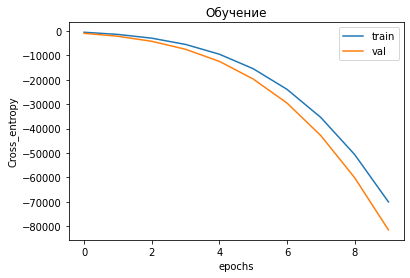

Epoch 1/10
29/29 [==============================] - 1s 9ms/step - loss: -28.0778 - val_loss: -331.2603
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: -635.2283 - val_loss: -1036.9825
Epoch 3/10
29/29 [==============================] - 0s 5ms/step - loss: -1522.2874 - val_loss: -2151.3921
Epoch 4/10
29/29 [==============================] - 0s 5ms/step - loss: -2944.1946 - val_loss: -3904.5852
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: -5153.0649 - val_loss: -6608.8965
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: -8511.9326 - val_loss: -10551.3262
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: -13280.7500 - val_loss: -16197.5723
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: -19937.3809 - val_loss: -23619.9414
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: -28754.8594 - val_loss: -33580.7500
Epoch 10/10
29/29 [========================

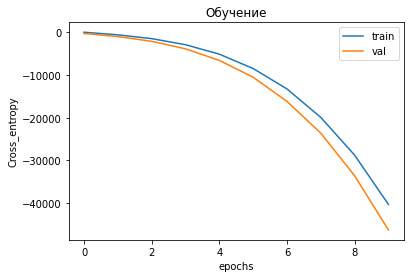

Epoch 1/10
29/29 [==============================] - 1s 9ms/step - loss: -484.7561 - val_loss: -858.2316
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: -1473.0566 - val_loss: -2069.8425
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: -3136.7822 - val_loss: -4119.7056
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: -5954.4702 - val_loss: -7480.4692
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: -10392.3262 - val_loss: -12562.5898
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: -16899.3047 - val_loss: -19815.5996
Epoch 7/10
29/29 [==============================] - 0s 4ms/step - loss: -26014.1094 - val_loss: -29687.3965
Epoch 8/10
29/29 [==============================] - 0s 4ms/step - loss: -38339.6211 - val_loss: -42745.5703
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: -54405.8945 - val_loss: -59638.0391
Epoch 10/10
29/29 [===================

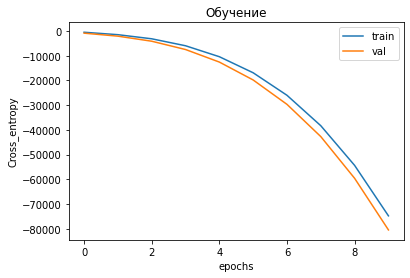

Средняя точность при Cross_val:  0.000980392156862745


In [143]:
#обучение с помощью кросс-валидации
kfold = StratifiedKFold(10)

scores = [] #пустой список для метрик

X = X.astype('float32')
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

for train_ix, test_ix in kfold.split(X, y):
  X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
  n_features = X.shape[1] # размерность Х

  model = keras.Sequential()
  model.add(layers.Dense(32, activation = 'relu', input_shape = (n_features,) ))
  model.add(layers.Dense(32, activation = 'relu'))
  #выходной слой
  model.add(layers.Dense(1, activation = 'sigmoid'))
  #компилируем модель
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
  #обучение модели
  history = model.fit(X_train, y_train, 
                      epochs = 10, 
                      batch_size = 32, 
                      verbose = 1, 
                      validation_data = (X_test, y_test))
  #predict test_set
  yhat = np.argmax(model.predict(X_test), axis=1)
  #валидируем наш прогноз
  score = accuracy_score(y_test, yhat)
  print('Accuracy: ', score)

  #визуализация процесса обучения
  plt.title('Обучение')
  plt.xlabel('epochs')
  plt.ylabel('Cross_entropy')
  plt.plot(history.history['loss'], label = 'train')
  plt.plot(history.history['val_loss'], label = 'val')
  plt.legend()
  plt.show()

  scores.append(score)

print('Средняя точность при Cross_val: ', (np.mean(scores)))

### Сохранение модели

In [93]:
pickle.dump(matrix_model, open('matrix_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://5f22789c-93a1-4be3-8f7b-a8bd925a3012/assets


In [94]:
model_load = pickle.load(open('matrix_model.pkl', 'rb'))